# INF4039 Deep Learning Systems / Giliojo mokymo sistemų taikymai
**LAB2**

## Introduction to the machine learning methods

In [1]:
import pandas as pd
import numpy as np
import timeit
import matplotlib.pyplot as plt

In [2]:
url="https://raw.githubusercontent.com/vytkuc/inf4039_2024_autumn/refs/heads/main/lab02_ml_methods/Titanic.csv"
df =pd.read_csv(url)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.drop('PassengerId', axis=1, inplace=True)
df.drop('Name', axis=1, inplace=True)
df.drop('Ticket', axis=1, inplace=True)
df.drop('Cabin', axis=1, inplace=True)

In [4]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [5]:
df['Sex'].replace("female", 0, inplace=True)
df['Sex'].replace("male", 1, inplace=True)

In [6]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Embarked,2


In [7]:
df = df.dropna()

In [8]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [9]:
df = df.reset_index()
df.head()

,index,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,0,3,1,22.0,1,0,7.2500,S
1,1,1,1,0,38.0,1,0,71.2833,C
2,2,1,3,0,26.0,0,0,7.9250,S
3,3,1,1,0,35.0,1,0,53.1000,S
4,4,0,3,1,35.0,0,0,8.0500,S


In [10]:
df.drop('index', axis=1, inplace=True)

In [11]:
#df.drop('level_0', axis=1, inplace=True)

In [12]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [13]:
df['Embarked'].describe()

,Embarked
count,712
unique,3
top,S
freq,554


In [14]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [15]:
df.shape

(712, 8)

In [16]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [17]:
from sklearn.preprocessing import OneHotEncoder

# Converting type of columns to category
df['Embarked'] = df['Embarked'].astype('category')


# Assigning numerical values and storing it in another columns
df['Embarked'] = df['Embarked'].cat.codes


# Create an instance of One-hot-encoder
enc = OneHotEncoder()

# Passing encoded columns

enc_data = pd.DataFrame(enc.fit_transform(
    df[['Embarked']]).toarray())

# Merge with main
df2 = df.join(enc_data)

display(df2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,0,1,2
0,0,3,1,22.0,1,0,7.2500,2,0.0,0.0,1.0
1,1,1,0,38.0,1,0,71.2833,0,1.0,0.0,0.0
2,1,3,0,26.0,0,0,7.9250,2,0.0,0.0,1.0
3,1,1,0,35.0,1,0,53.1000,2,0.0,0.0,1.0
4,0,3,1,35.0,0,0,8.0500,2,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
707,0,3,0,39.0,0,5,29.1250,1,0.0,1.0,0.0
708,0,2,1,27.0,0,0,13.0000,2,0.0,0.0,1.0
709,1,1,0,19.0,0,0,30.0000,2,0.0,0.0,1.0
710,1,1,1,26.0,0,0,30.0000,0,1.0,0.0,0.0


In [18]:
#df2.rename(columns={'0': 'Embarked_C','1': 'Embarked_Q','2': 'Embarked_S'}, inplace=True)

In [19]:
df2.drop('Embarked', axis=1, inplace=True)

In [20]:
df2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,0,1,2
0,0,3,1,22.0,1,0,7.2500,0.0,0.0,1.0
1,1,1,0,38.0,1,0,71.2833,1.0,0.0,0.0
2,1,3,0,26.0,0,0,7.9250,0.0,0.0,1.0
3,1,1,0,35.0,1,0,53.1000,0.0,0.0,1.0
4,0,3,1,35.0,0,0,8.0500,0.0,0.0,1.0


In [21]:
df['Pclass'].unique()

array([3, 1, 2])

In [22]:
#from sklearn.preprocessing import MinMaxScaler
#columns_for_rescale = ["Age", "Fare"]
#columns_other = ["Survived", "Pclass", "Sex", "SibSp", "Parch", "0", "1", "2"]
#scaler = MinMaxScaler()

#X_numeric_std = pd.DataFrame(data=scaler.fit_transform(df2[columns_for_rescale]), columns=columns_for_rescale)
#df3 = pd.merge(X_numeric_std, df2[columns_other], left_index=True, right_index=True)

In [23]:
normalized_df=(df2-df2.min())/(df2.max()-df2.min())

In [24]:
normalized_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,0,1,2
0,0.0,1.0,1.0,0.271174,0.2,0.0,0.014151,0.0,0.0,1.0
1,1.0,0.0,0.0,0.472229,0.2,0.0,0.139136,1.0,0.0,0.0
2,1.0,1.0,0.0,0.321438,0.0,0.0,0.015469,0.0,0.0,1.0
3,1.0,0.0,0.0,0.434531,0.2,0.0,0.103644,0.0,0.0,1.0
4,0.0,1.0,1.0,0.434531,0.0,0.0,0.015713,0.0,0.0,1.0


In [25]:
df3 = normalized_df.copy()

In [26]:
#pd.options.display.max_columns = None
#pd.options.display.max_rows = None
#display(df2)

In [27]:
df3.shape

(712, 10)

In [37]:
df3.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [36]:
df3.rename(columns={0: 'Embarked_C',1: 'Embarked_Q',2: 'Embarked_S'}, inplace=True)

In [28]:
X = df3.iloc[:,1:10]  #independent columns
y = df3.iloc[:,0]    #target column

X = X.to_numpy()
y = y.to_numpy()

# SVM

In [29]:
#https://www.geeksforgeeks.org/multiclass-classification-using-scikit-learn/
#https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

seed=77
np.random.seed(seed)
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import statistics

i = 1
accuracy_model = []
for train, test in cv.split(X, y):
    print('\n-----------------------------------------------------------------')
    print('Running cross validation sample %d' % (i))
    print('------------------------------------------------------------------')

    print("Dimension of Train set",X[train].shape)
    print("Dimension of Test set",X[test].shape,"\n")

    # training a linear SVM classifier
    svm_model_linear = SVC(decision_function_shape='ovr', kernel = 'linear', C = 1).fit(X[train], y[train])
    svm_predictions = svm_model_linear.predict(X[test])

    # model accuracy for X_test
    accuracy = svm_model_linear.score(X[test], y[test])

    # creating a confusion matrix
    cm = confusion_matrix(y[test], svm_predictions)

    # Append to accuracy_model the accuracy of the model
    accuracy_model.append(accuracy_score(y[test], svm_model_linear.predict(X[test]), normalize=True)*100)

    print("Accuracy:", accuracy)
    print(cm)

    # Print the accuracy
    print(accuracy_model)
    print(statistics.mean(accuracy_model))

    i += 1


-----------------------------------------------------------------
Running cross validation sample 1
------------------------------------------------------------------
Dimension of Train set (640, 9)
Dimension of Test set (72, 9) 

Accuracy: 0.7638888888888888
[[35  8]
 [ 9 20]]
[76.38888888888889]
76.38888888888889

-----------------------------------------------------------------
Running cross validation sample 2
------------------------------------------------------------------
Dimension of Train set (640, 9)
Dimension of Test set (72, 9) 

Accuracy: 0.7222222222222222
[[35  8]
 [12 17]]
[76.38888888888889, 72.22222222222221]
74.30555555555554

-----------------------------------------------------------------
Running cross validation sample 3
------------------------------------------------------------------
Dimension of Train set (641, 9)
Dimension of Test set (71, 9) 

Accuracy: 0.7887323943661971
[[36  7]
 [ 8 20]]
[76.38888888888889, 72.22222222222221, 78.87323943661971]
75.8281

Decision Tree

In [30]:
#https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
#https://www.geeksforgeeks.org/multiclass-classification-using-scikit-learn/

In [31]:
seed=77
np.random.seed(seed)
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
from sklearn.tree import DecisionTreeClassifier

i = 0
for train, test in cv.split(X, y):
    print('\n-----------------------------------------------------------------')
    print('Running cross validation sample %d' % (i))
    print('------------------------------------------------------------------')

    dtree_model = DecisionTreeClassifier().fit(X[train], y[train])
    dtree_predictions = dtree_model.predict(X[test])

    # model accuracy for X_test
    accuracy = dtree_model.score(X[test], y[test])

    # creating a confusion matrix
    cm = confusion_matrix(y[test], dtree_predictions)

    print("Accuracy:", accuracy)
    print(cm)
    i += 1


-----------------------------------------------------------------
Running cross validation sample 0
------------------------------------------------------------------
Accuracy: 0.7638888888888888
[[33 10]
 [ 7 22]]

-----------------------------------------------------------------
Running cross validation sample 1
------------------------------------------------------------------
Accuracy: 0.6666666666666666
[[32 11]
 [13 16]]

-----------------------------------------------------------------
Running cross validation sample 2
------------------------------------------------------------------
Accuracy: 0.8450704225352113
[[36  7]
 [ 4 24]]

-----------------------------------------------------------------
Running cross validation sample 3
------------------------------------------------------------------
Accuracy: 0.7464788732394366
[[33 10]
 [ 8 20]]

-----------------------------------------------------------------
Running cross validation sample 4
-----------------------------------

In [32]:
# importing necessary libraries
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# dividing X, y into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Dimension of Train and Test set
print("Dimension of Train set",X_train.shape)
print("Dimension of Test set",X_test.shape,"\n")

# training a DescisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dtree_model = DecisionTreeClassifier().fit(X_train, y_train)
dtree_predictions = dtree_model.predict(X_test)

# model accuracy for X_test
accuracy = dtree_model.score(X_test, y_test)

# creating a confusion matrix
cm = confusion_matrix(y_test, dtree_predictions)

print("Accuracy:", accuracy)
print(cm)

Dimension of Train set (569, 9)
Dimension of Test set (143, 9) 

Accuracy: 0.7412587412587412
[[74 20]
 [17 32]]


Naive Bayes classifier

https://www.sicara.ai/blog/2018-02-28-naive-bayes-classification-sklearn

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

# Split dataset in training and test datasets
X_train, X_test = train_test_split(df3, test_size=0.2, random_state=int(time.time()))

# Dimension of Train and Test set
print("Dimension of Train set",X_train.shape)
print("Dimension of Test set",X_test.shape,"\n")

# Instantiate the classifier
gnb = GaussianNB()
used_features = ["Pclass","Sex", "Age","SibSp","Parch","Fare",'Embarked_C', 'Embarked_Q', 'Embarked_S']

# Train classifier
gnb.fit(X_train[used_features].values, X_train["Survived"])
y_pred = gnb.predict(X_test[used_features])

# Print results
print("Number of mislabeled points out of a total {} points : {}, performance {:05.2f}%"
      .format(
          X_test.shape[0],
          (X_test["Survived"] != y_pred).sum(),
          100*(1-(X_test["Survived"] != y_pred).sum()/X_test.shape[0])
))

Dimension of Train set (569, 10)
Dimension of Test set (143, 10) 

Number of mislabeled points out of a total 143 points : 39, performance 72.73%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


https://www.datacamp.com/community/tutorials/naive-bayes-scikit-learn

In [39]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Dimension of Train and Test set
print("Dimension of Train set",X_train.shape)
print("Dimension of Test set",X_test.shape,"\n")

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
GaussianNB().fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)

Dimension of Train set (569, 9)
Dimension of Test set (143, 9) 



NotFittedError: This GaussianNB instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [40]:
# importing necessary libraries
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# dividing X, y into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Dimension of Train and Test set
print("Dimension of Train set",X_train.shape)
print("Dimension of Test set",X_test.shape,"\n")

# training a Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X_train, y_train)
gnb_predictions = gnb.predict(X_test)

# accuracy on X_test
accuracy = gnb.score(X_test, y_test)
print ("Accuracy:", accuracy)

# creating a confusion matrix
cm = confusion_matrix(y_test, gnb_predictions)
print (cm)

Dimension of Train set (569, 9)
Dimension of Test set (143, 9) 

Accuracy: 0.7202797202797203
[[71 18]
 [22 32]]


kNN

https://www.geeksforgeeks.org/multiclass-classification-using-scikit-learn/

In [41]:
# importing necessary libraries
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# dividing X, y into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Dimension of Train and Test set
print("Dimension of Train set",X_train.shape)
print("Dimension of Test set",X_test.shape,"\n")

# training a KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier().fit(X_train, y_train)

# accuracy on X_test
accuracy = knn.score(X_test, y_test)
print ("Accuracy:", accuracy)

# creating a confusion matrix
knn_predictions = knn.predict(X_test)
cm = confusion_matrix(y_test, knn_predictions)
print (cm)

Dimension of Train set (569, 9)
Dimension of Test set (143, 9) 

Accuracy: 0.7482517482517482
[[69 16]
 [20 38]]


In [43]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier().fit(X,y)

from sklearn.model_selection import cross_val_score
results = cross_val_score(knn, X, y, cv=10)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 78.80% (2.67%)


In [ ]:
print(results)

Logistic Regression

0.7482517482517482
[[71 15]
 [21 36]]


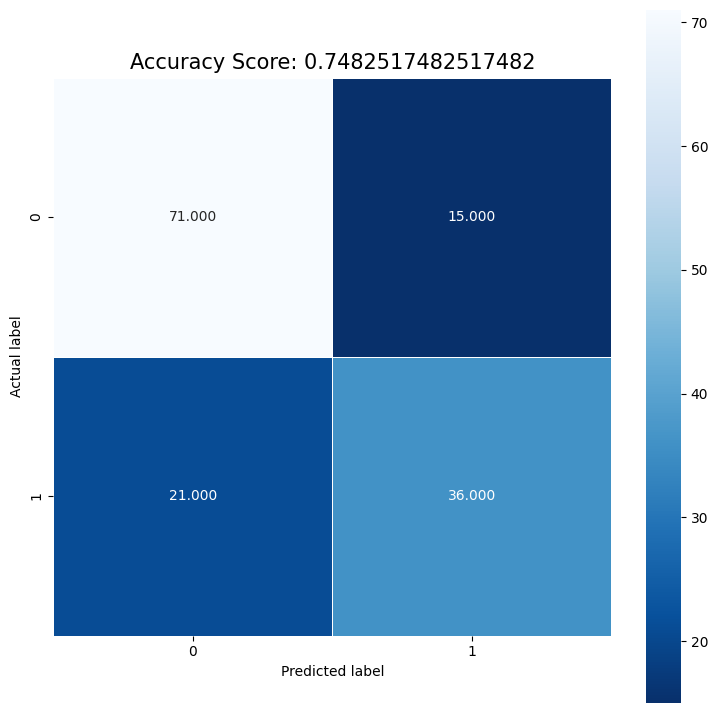

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

from sklearn.linear_model import LogisticRegression

# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()

logisticRegr.fit(X_train, y_train)
predictions = logisticRegr.predict(X_test)

# Use score method to get accuracy of model
score = logisticRegr.score(X_test, y_test)
print(score)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);


Logistic Regression CV

In [45]:
from sklearn.linear_model import LogisticRegressionCV

# all parameters not specified are set to their defaults
logisticRegrCV = LogisticRegressionCV(cv=10, max_iter=2000)
logisticRegrCV.fit(X, y)

# Use score method to get accuracy of model
score = logisticRegrCV.score(X, y)
print(score)

0.7963483146067416


In [ ]:
#RandomForest
#https://www.datacamp.com/community/tutorials/random-forests-classifier-python

In [46]:
seed=77
np.random.seed(seed)
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import statistics

from sklearn.ensemble import RandomForestClassifier

i = 1
accuracy_model = []
for train, test in cv.split(X, y):
    print('\n-----------------------------------------------------------------')
    print('Running cross validation sample %d' % (i))
    print('------------------------------------------------------------------')

    print("Dimension of Train set",X[train].shape)
    print("Dimension of Test set",X[test].shape,"\n")

    clf = RandomForestClassifier(n_estimators=100).fit(X[train], y[train])
    predictions = clf.predict(X[test])

    # Use score method to get accuracy of model
    accuracy = clf.score(X[test], y[test])
    print(accuracy)

    # creating a confusion matrix
    cm = confusion_matrix(y[test], predictions)
    cr = classification_report(y[test], predictions, zero_division=0)

    # Append to accuracy_model the accuracy of the model
    accuracy_model.append(accuracy_score(y[test], clf.predict(X[test]), normalize=True)*100)

    print(cm)
    print(cr)

    # Print the accuracy
    print(accuracy_model)
    print(statistics.mean(accuracy_model))

    i += 1


-----------------------------------------------------------------
Running cross validation sample 1
------------------------------------------------------------------
Dimension of Train set (640, 9)
Dimension of Test set (72, 9) 

0.8055555555555556
[[37  6]
 [ 8 21]]
              precision    recall  f1-score   support

         0.0       0.82      0.86      0.84        43
         1.0       0.78      0.72      0.75        29

    accuracy                           0.81        72
   macro avg       0.80      0.79      0.80        72
weighted avg       0.80      0.81      0.80        72

[80.55555555555556]
80.55555555555556

-----------------------------------------------------------------
Running cross validation sample 2
------------------------------------------------------------------
Dimension of Train set (640, 9)
Dimension of Test set (72, 9) 

0.6944444444444444
[[33 10]
 [12 17]]
              precision    recall  f1-score   support

         0.0       0.73      0.77      0